### Linear regression from scratch

In this seminar you will implement a linear regression and train it using just the (stochastic) gradient descent, numpy and your brain.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

**Acknowledgements**: I've primariliy used the material from [Andrew Ng's Coursera course][1] for this, but have also been helped by [this article][2] and [this one][3]. I used some code for the animation from [this kernel][4].

  [1]: https://www.coursera.org/learn/machine-learning
  [2]: http://tillbergmann.com/blog/python-gradient-descent.html
  [3]: http://aimotion.blogspot.co.uk/2011/10/machine-learning-with-python-linear.html
  [4]: https://www.kaggle.com/ronaldtroncoso20/d/START-UMD/gtd/global-terrorism-trends-animation

Load the libraries and data...

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import http
import io
import requests

url = 'https://raw.githubusercontent.com/HSE-LaMBDA/MLatURL2019/master/day2/house-train.csv'
try:
    data = pd.read_csv(url)
except http.client.IncompleteRead as e:
    r = requests.get(url, timeout=10)
    b = io.StringIO(r.text)
    data = pd.read_csv(b)

Inspect the data

In [3]:
data

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

### Univariate linear regression using an analytic solution

In this section, you will program the univariate least squares linear regression from scratch using an analytic formulae. 

Recall, that we're working with a problem of finding a weight $w$ such that
$$
\sum_i (y_i - w \cdot x_i)^2 \to \min,
$$
with $x_i, y_i \in R^1$, i.e. they are numbers. 

Recall that our least squares solution is of the form: 
$$
\widehat{w}_1 = 
    \frac{\sum_{i=1}^{\ell} (x_i - \mu_x) (y_i - \mu_y)}
        {\sum_{i=1}^{\ell} (x_i - \mu_x)^2}, \\
\widehat{w}_0 = \mu_y - \widehat{w}_1 \mu_x
$$
with $\mu_x = \frac{1}{\ell} \sum_{i=1}^{\ell} x_i,
\quad
\mu_y = \frac{1}{\ell} \sum_{i=1}^{\ell} y_i$

Hints: use `np.mean` to compute the mean. 

In [4]:
def compute_weights_univariate(X, y):
    """
    Given feature array X [n_samples], target vector y [n_samples],
    compute the optimal least squares solution using the formulae above.
    """
    ### BEGIN SOLUTION
    # compute mean values for X and y
    mu_x = np.mean(X)
    mu_y = np.mean(y)
    
    # compute the estimate of w_1 and w_0 
    w_1 = np.sum((X - mu_x) * (y - mu_y)) / np.sum((X - mu_x) ** 2)
    w_0 = mu_y - w_1 * mu_x
    ### END SOLUTION
    return np.array([w_0, w_1])

In [5]:
from nose.tools import assert_equal, timed, assert_equals
import numpy.testing as np_testing
import time

In [6]:
X = data['GrLivArea']
y = data['SalePrice']

w = compute_weights_univariate(X, y)
w

array([18569.02585649,   107.13035897])

In [7]:
np_testing.assert_equal(compute_weights_univariate([0., 1., 2.], [0., 1., 2.]), np.array([0., 1.]))

np_testing.assert_equal(compute_weights_univariate([0., 1., 2.], [3., 2., 1.]), np.array([3., -1.]))

### BEGIN HIDDEN TESTS
np_testing.assert_almost_equal(
    compute_weights_univariate(X, y),
    [18569.02585649,   107.13035897]
)

# testing that solution is tyime efficient
@timed(0.01)
def time_testing(X, y):
    compute_weights_univariate(X, y)
time_testing(X, y)
### END HIDDEN TESTS

**How precise are we?**

We commonly evaluate predictions using MSE errors. These are defined as:
$$
MSE(y, \widehat{y}) = \frac 1 \ell \sum_i (y_i - w^T x_i)^2
$$
as implemented either by `sklearn.metrics.mean_squared_error` or simply by `np.mean((y - y_pred) ** 2)`.

We then use $\sqrt{MSE(y, \widehat{y})}$ to obtain numbers in the same dimensionality (units, not units squared).

In [8]:
from sklearn.metrics import mean_squared_error

In [9]:
w_0, w_1 = w
np.sqrt(
    mean_squared_error(y, np.dot(X, w_1) + w_0)
)

56034.303865279944

Text(0.5, 1.0, 'Error $y - X \\widehat{w}$')

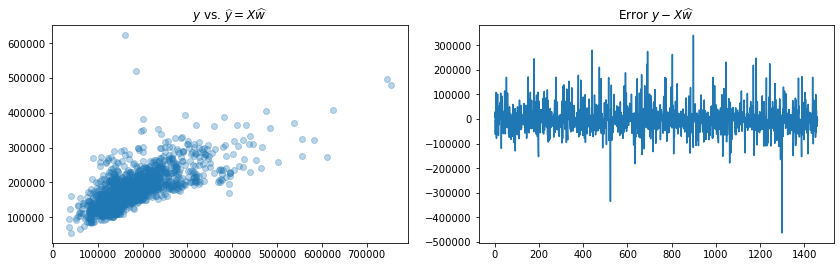

In [10]:
f, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
axs[0].scatter(y, np.dot(X, w_1) + w_0, alpha=.3)
axs[0].set_title('$y$ vs. $\widehat{y} = X \widehat{w}$')
axs[1].plot(y - (np.dot(X, w_1) + w_0))
axs[1].set_title('Error $y - X \widehat{w}$')

### Multivariate linear regression using an analytic solution

In this section, you will program the **multi**variate least squares linear regression from scratch using an analytic formulae. 

Recall, that we're working with a problem of finding a weight $w$ such that
$$
||\mathbf{y} - \mathbf{X} \mathbf{w}|| \to \min_{\mathbf{w}},
$$
with $\mathbf{x}_i \in R^n$, i.e. features are no longer supposed to be single numbers, but vectors of numbers (but still $y_i \in R^1$).

Recall that our least squares solution is of the form: 
$$
\mathbf{w} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}.
$$

We could account for the non-zero mean case ($\mathrm{E} \mathbf{y} \neq 0$) by either adding and subtracting the mean, or by using an additional feature in $\mathbf{X}$ set to all ones.

Hint: matrix inverse is computed by `np.linalg.inv`, and matrix-vector product by `np.dot`.

In [11]:
def prepare_features(X):
    """
    Given feature array X [n_samples, n_features], preprocess it by
    standardizing and appending a column of 1s.
    """
    # First, standardize the input by subtracting mean and dividing by std
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    
    # Append a free term (a column of 1s)
    X = np.c_[np.ones(X.shape[0]), X]
    return X

In [12]:
def compute_weights_multivariate(X, y):
    """
    Given feature array X [n_samples, 1], target vector y [n_samples],
    compute the optimal least squares solution using the formulae above.
    Don't forget the bias term!
    """
    ### BEGIN SOLUTION
    X = prepare_features(X)
    
    # Compute the "inverting operator"
    R = np.dot(
        np.linalg.inv(
            np.dot(X.T, X)
        ), X.T
    )
    # Compute the actual solution
    w = np.dot(R, y)
    ### END SOLUTION
    return w

In [13]:
X = data['GrLivArea']
X = np.atleast_2d(X).T
y = data['SalePrice']

w = compute_weights_multivariate(X, y)
w

array([180921.19589041,  56275.61972722])

In [14]:
w

array([180921.19589041,  56275.61972722])

In [15]:
X_test_1 = np.array([0., 1., 2.]).reshape(-1, 1)
y_test_1 = np.array([0., 1., 2.])
np_testing.assert_almost_equal(
    compute_weights_multivariate(X_test_1, y_test_1), 
    np.array([1.        , 0.81649658])
)

X_test_2 = np.array([0., 1., 2.]).reshape(-1, 1)
y_test_2 = np.array([3., 2., 1.])
np_testing.assert_almost_equal(
    compute_weights_multivariate(X_test_2, y_test_2), 
    np.array([2.        , -0.81649658])
)

### BEGIN HIDDEN TESTS
np_testing.assert_almost_equal(
    compute_weights_multivariate(X, y),
    [180921.19589041,  56275.61972722]
)
### END HIDDEN TESTS

Now that you have implemented the weight computation procedure, you can test it using our dataset, using 
* different features (or even their subsets!),
* different sub-samples of $x_i$s and $y_i$s.

In [16]:
columns = [
    'LotFrontage',
    'LotArea',
    'MoSold',
    'YrSold',
    'OverallQual',
    'OverallCond',
    'YearBuilt',
    'YearRemodAdd',
    'MasVnrArea',
    'BsmtFinSF1',
    'GrLivArea'
]

In [17]:
for col in columns: 
    X = data[col]
    X = np.atleast_2d(X).T
    y = data['SalePrice']
    
    # remove non-filled rows
    isnan_mask = np.any(np.isnan(X), axis=1) | np.isnan(y)
    X = X[~isnan_mask]
    y = y[~isnan_mask]
    
    w = compute_weights_multivariate(X, y)
    
    # note that we must construct the same feature vector to compute predictions
    # i.e. standardize and append column of 1s
    X = prepare_features(X)
    print('RMS error when using a single column "{col}" as regressor is {error:.2f}'
        .format(
            col=col,
            error=np.sqrt(mean_squared_error(y, np.dot(X, w)))
        )
    )

RMS error when using a single column "LotFrontage" as regressor is 78026.38
RMS error when using a single column "LotArea" as regressor is 76601.25
RMS error when using a single column "MoSold" as regressor is 79329.64
RMS error when using a single column "YrSold" as regressor is 79382.07
RMS error when using a single column "OverallQual" as regressor is 48589.45
RMS error when using a single column "OverallCond" as regressor is 79174.24
RMS error when using a single column "YearBuilt" as regressor is 67693.25
RMS error when using a single column "YearRemodAdd" as regressor is 68446.98
RMS error when using a single column "MasVnrArea" as regressor is 69639.10
RMS error when using a single column "BsmtFinSF1" as regressor is 73246.55
RMS error when using a single column "GrLivArea" as regressor is 56034.30


We could now easily combine multiple features for regression

In [18]:
from itertools import combinations

In [19]:
for cols in combinations(columns, 2): 
    X = data[list(cols)]
#     X = np.atleast_2d(X).T
    y = data['SalePrice']
    
    # remove non-filled rows
    isnan_mask = np.any(np.isnan(X), axis=1) | np.isnan(y)
    X = X[~isnan_mask]
    y = y[~isnan_mask]
    
    w = compute_weights_multivariate(X, y)
    
    # note that we must construct the same feature vector to compute predictions
    # i.e. standardize and append column of 1s
    X = prepare_features(X)
    print('RMS error when using a columns "{col}" as regressor is {error:.2f}'
        .format(
            col=cols,
            error=np.sqrt(mean_squared_error(y, np.dot(X, w)))
        )
    )

RMS error when using a columns "('LotFrontage', 'LotArea')" as regressor is 76594.08
RMS error when using a columns "('LotFrontage', 'MoSold')" as regressor is 77921.65
RMS error when using a columns "('LotFrontage', 'YrSold')" as regressor is 78002.37
RMS error when using a columns "('LotFrontage', 'OverallQual')" as regressor is 48053.41
RMS error when using a columns "('LotFrontage', 'OverallCond')" as regressor is 77649.46
RMS error when using a columns "('LotFrontage', 'YearBuilt')" as regressor is 65998.09
RMS error when using a columns "('LotFrontage', 'YearRemodAdd')" as regressor is 66474.77
RMS error when using a columns "('LotFrontage', 'MasVnrArea')" as regressor is 68845.36
RMS error when using a columns "('LotFrontage', 'BsmtFinSF1')" as regressor is 73012.58
RMS error when using a columns "('LotFrontage', 'GrLivArea')" as regressor is 58906.67
RMS error when using a columns "('LotArea', 'MoSold')" as regressor is 76513.66
RMS error when using a columns "('LotArea', 'YrSo

### Multivariante linear regression using the Gradient Descent

To use the gradient descent, we must 
* initialize the weights $\mathbf{w}$ somehow,
* find a way of computing the __gradient__ of our quality measure $L(\mathbf{y}, \widehat{\mathbf{y}})$ w.r.t. $\mathbf{w}$,
* starting from the initialization, iteratively update weights using the gradient descent: 
$$
\mathbf{w}^{(i+1)} \leftarrow \mathbf{w}^{(i)} - \gamma \nabla_{\mathbf{w}} L
$$

Since we choose $L(\mathbf{y}, \widehat{\mathbf{y}}) \equiv \frac 1 \ell ||\mathbf{y} - \mathbf{X} \mathbf{w} ||^2$, our gradient is $ \frac 2 \ell (\mathbf{y} - \mathbf{X} \mathbf{w}) \mathbf{X} $

In [20]:
def compute_gradient(X, y, w):
    """
    Computes the gradient of MSE loss 
    for multivariate linear regression of X onto y 
    w.r.t. w, evaluated at the current w.
    """
    ### BEGIN SOLUTION
    prediction = np.dot(X, w)  # [n_objects, n_features] * [n_features] -> [n_objects]
    error = prediction - y  # [n_objects]
    ### END SOLUTION
    return 2 * np.dot(error, X) / len(error)  # [n_objects] * [n_objects, n_features] -> [n_features]

In [21]:
X_test_1 = np.array([0., 1., 2.]).reshape(-1, 1)
y_test_1 = np.array([0., 1., 2.])
np_testing.assert_almost_equal(
    compute_gradient(X_test_1, y_test_1, np.array([1.])), 
    np.array([0.])
)

np_testing.assert_almost_equal(
    compute_gradient(X_test_1, y_test_1, np.array([0.1])), 
    np.array([-3])
)


### BEGIN HIDDEN TESTS
X_test_2 = np.array([0., 1., 2.]).reshape(-1, 1)
y_test_2 = np.array([3., 2., 1.])
np_testing.assert_almost_equal(
    compute_gradient(X_test_2, y_test_2, np.array([0.2])), 
    np.array([-2.])
)

np_testing.assert_almost_equal(
    compute_gradient(X_test_2, y_test_2, np.array([0.5])), 
    np.array([-1.])
)
### END HIDDEN TESTS

In [22]:
def gradient_descent(X, y, w_init, iterations=1, gamma=0.01):
    """
    Performs the required number of iterations of gradient descent.
    Parameters:
        X [n_objects, n_features]: matrix of featues
        y [n_objects]: responce (dependent) variable
        w_init: the value of w used as an initializer
        iterations: number of steps for gradient descent to compute
        gamma: learning rate (gradient multiplier)
    """
    costs, ws = [], []
    w = w_init
    for i in range(iterations):
        # Compute our cost in current point (before the gradient step)
        costs.append(mean_squared_error(y, np.dot(X, w)) / len(y))
        
        # Remember our weights w in current point
        ws.append(w)
        
        ### BEGIN SOLUTION
        # Compute gradient for w
        w_grad = compute_gradient(X, y, w)
        
        # Update the current weight w using the formula above (see comments)
        w = w - gamma * w_grad
        ### END SOLUTION
    return costs, ws

How run the gradient descent to find the optimal weights vector.

In [23]:
X = data['GrLivArea']
X = np.atleast_2d(X).T
X = prepare_features(X)
y = data['SalePrice']

gamma = 0.01  # Step size
iterations = 200  # No. of iterations
np.random.seed(123)  # Set the seed
w_init = np.random.rand(X.shape[1]) #Pick some random values to start with

# Pass the relevant variables to the function and get the new values back...
costs, ws = gradient_descent(X, y, w_init, iterations, gamma)
w = ws[-1]

# Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(w[0], w[1]))

Gradient Descent: 177674.24, 55265.65


In [24]:
np_testing.assert_almost_equal(
    w, 
    np.array([177674.23662133,  55265.65282685])
)

The following 3 code cells display the cost function and its progress as the learning continues.

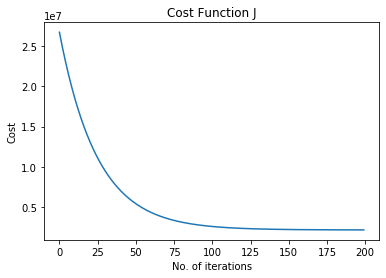

In [25]:
#Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(costs)
plt.show()

In [26]:
#Animation
def animate_to_gif(X, y, costs, out_filename='animation.gif'):

    fig = plt.figure()
    ax = plt.axes()
    plt.title('Sale Price vs Living Area')
    plt.xlabel('Living Area in square feet (normalised)')
    plt.ylabel('Sale Price ($)')
    plt.scatter(X[:,1], y, color='red')
    line, = ax.plot([], [], lw=2)
    annotation = ax.text(-1, 700000, '')
    annotation.set_animated(True)
    plt.close()

    #Generate the animation data,
    def init():
        line.set_data([], [])
        annotation.set_text('')
        return line, annotation

    # animation function.  This is called sequentially
    def animate(i):
        x = np.linspace(-5, 20, 1000)
        y = ws[i][1]*x + ws[i][0]
        line.set_data(x, y)
        annotation.set_text('Cost = %.2f e10' % (costs[i]/10000000000))
        return line, annotation

    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=iterations, interval=0, blit=True)

    anim.save(out_filename, writer='pillow', fps = 30)
    

def animation_display(filename='animation.gif'):
    #Display the animation...
    import io
    import base64
    from IPython.display import HTML

    video = io.open(filename, 'r+b').read()
    encoded = base64.b64encode(video)
    HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))


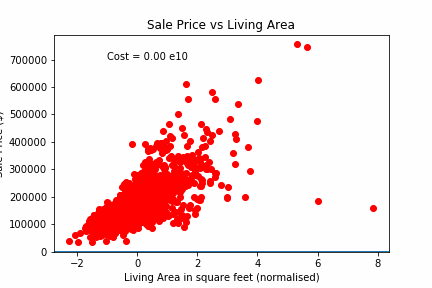

In [27]:
out_filename = 'animation_gd.gif'

animate_to_gif(X, y, costs, out_filename)

#Display the animation...
import io
import base64
from IPython.display import HTML

video = io.open(out_filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

### Multivariante linear regression using the Stochastic Gradient Descent

In Stochastic Gradient Descent (SGD), we must do the same as for vanilla GD
* initialize the weights $\mathbf{w}$ somehow,
* find a way of computing the __gradient__ of our quality measure $L(\mathbf{y}, \widehat{\mathbf{y}})$ w.r.t. $\mathbf{w}$,
* starting from the initialization, iteratively update weights using the gradient descent: 
$$
\mathbf{w}^{(i+1)} \leftarrow \mathbf{w}^{(i)} - \gamma \nabla_{\mathbf{w}} L
$$
**but** we now compute the gradient with respect to __a single sample__ $(\mathbf{x}_i, y_i)$ only.

Thus, since we choose $L(y_i, \widehat{y}_i) \equiv (y_i - \mathbf{x}_i^T \mathbf{w} )^2$, 
our gradient is $ 2 (y_i - \mathbf{x}_i^T \mathbf{w}) \mathbf{x}_i $.

In fact, we can still use the already implemented `compute_gradient` function, but now we should only pass inside the subset (one) input vector.

In [28]:
def stochastic_gradient_descent(X, y, w_init, iterations=1, gamma=0.01):
    """
    Performs the required number of iterations of stochastic gradient descent.
    Parameters:
        X [n_objects, n_features]: matrix of featues
        y [n_objects]: responce (dependent) variable
        w_init: the value of w used as an initializer
        iterations: number of steps for gradient descent to compute
        gamma: learning rate (gradient multiplier)
    """
    costs, ws = [], []
    w = w_init
    for i in range(iterations):
        # Compute our cost in current point (before the gradient step)
        costs.append(mean_squared_error(y, np.dot(X, w)) / len(y))
        
        # Remember our weights w in current point
        ws.append(w)
        
        ### BEGIN SOLUTION
        # Select a random sample from the dataset
        i = np.random.choice(len(y))
        
        # Compute gradient for w
        w_grad = compute_gradient(
            np.atleast_2d(X[i]), 
            np.atleast_1d(y[i]), 
            w)
        
        # Update the current weight w using the formula above (see comments)
        w = w - gamma * w_grad
        ### END SOLUTION

    return costs, ws

In [29]:
X = data['GrLivArea']
X = np.atleast_2d(X).T
X = prepare_features(X)
y = data['SalePrice']

gamma = 0.01  # Step size
iterations = 200  # No. of iterations
np.random.seed(123)  # Set the seed
w_init = np.random.rand(X.shape[1]) #Pick some random values to start with

# Pass the relevant variables to the function and get the new values back...
costs, ws = stochastic_gradient_descent(X, y, w_init, iterations, gamma)
w = ws[-1]

# Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(w[0], w[1]))

Gradient Descent: 172364.64, 49446.91


In [30]:
np_testing.assert_almost_equal(
    w, 
    np.array([172364.64144751,  49446.9057125])
)

Note that the cost function is not as smooth anymore

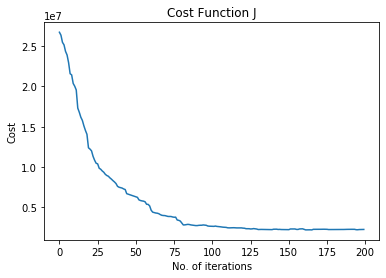

In [31]:
#Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(costs)
plt.show()

Also note how, along with training, the line estimate is more noisy.

In [32]:
out_filename = 'animation_sgd.gif'

animate_to_gif(X, y, costs, out_filename)

#Display the animation...
import io
import base64
from IPython.display import HTML

video = io.open(out_filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

### Train / Validation split

We commonly set aside a portion of data for testing our model. In typical scenarios, this corresponds to n-fold cross-validation, but here for the sake of simplicity we only show the train/test split.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data[columns]
y = data['SalePrice']

# this is common as many columns tend to be empty for some reason
isnan_mask = np.any(np.isnan(X), axis=1) | np.isnan(y)
X = X[~isnan_mask].values
y = y[~isnan_mask].values
# X = prepare_features(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
w = compute_weights_multivariate(X_train, y_train)
w

In [ ]:
train_rmse = np.sqrt(mean_squared_error(y_train, np.dot(prepare_features(X_train), w)))
test_rmse = np.sqrt(mean_squared_error(y_test, np.dot(prepare_features(X_test), w)))

print('Train error: ', train_rmse)
print('Test error: ', test_rmse)

It turns out that for many cases, validation-set MSE will be very different from MSE computed on train test. Regularization could be seen as one of the ways of tuning (additionally penalizing) the model for being _too well_ fitted on training data. Thus, performance on the validation set is more consistent with that on the training set.

### Regularized multivariate regression

The regularized least squares are given by the formula:
$$
\mathbf{w}^* =
  ( \mathbf{X}^{\intercal} \mathbf{X} + \alpha \mathbf{I})^{-1}
  \mathbf{X}^{\intercal} \mathbf{y}
$$

In [ ]:
def compute_weights_multivariate_l2reg(X, y, reg=1e-3):
    """
    Given feature array X [n_samples, 1], target vector y [n_samples],
    compute the optimal least squares solution using the formulae above.
    Don't forget the bias term!
    """
    ### BEGIN SOLUTION
    X = prepare_features(X)
    
    # Compute the "regularized inverting operator"
    R = np.dot(
        np.linalg.inv(
            np.dot(X.T, X) + reg * np.eye(X.shape[1])
        ), X.T
    )
    # Compute the actual solution
    w = np.dot(R, y)
    ### END SOLUTION
    return w

In [ ]:
w_reg = compute_weights_multivariate_l2reg(X_train, y_train, reg=0)

train_rmse = np.sqrt(mean_squared_error(y_train, np.dot(prepare_features(X_train), w_reg)))
test_rmse = np.sqrt(mean_squared_error(y_test, np.dot(prepare_features(X_test), w_reg)))

print('Train error: ', train_rmse)
print('Test error: ', test_rmse)

In [ ]:
X_test_1 = np.array([0., 1., 2.]).reshape(-1, 1)
y_test_1 = np.array([0., 1., 2.])

X_test_1_val = X_test_1 + 0.5
y_test_1_val = np.array([0.5, -0.5, 0.])

w_reg = compute_weights_multivariate_l2reg(X_test_1, y_test_1, reg=0.)
val_rmse = np.sqrt(mean_squared_error(y_test_1_val, np.dot(prepare_features(X_test_1_val), w_reg)))
np_testing.assert_almost_equal(
    val_rmse, 
    1.4719601443879744
)

w_reg = compute_weights_multivariate_l2reg(X_test_1, y_test_1, reg=1.)
val_rmse = np.sqrt(mean_squared_error(y_test_1_val, np.dot(prepare_features(X_test_1_val), w_reg)))
np_testing.assert_almost_equal(
    val_rmse, 
    1.1636866703140785
)

### BEGIN HIDDEN TESTS
np_testing.assert_almost_equal(
    compute_weights_multivariate_l2reg(X_train, y_train, reg=0),
    [
        178518.57,    977.20602702,   4580.06667258,    665.2280238,
        622.51374017,  32539.54891093,   2796.43402859,  11806.0259189,
        6659.85912742,   7381.89712021,   7136.00063813,  23526.55515589]
)
### END HIDDEN TESTS

In [ ]:
reg_values = []
train_rmses, test_rmses = [], []
for reg in np.linspace(0.1, 100, 100):
    w_reg = compute_weights_multivariate_l2reg(X_train, y_train, reg=reg)
    reg_values.append(reg)

    train_rmse = np.sqrt(mean_squared_error(y_train, np.dot(prepare_features(X_train), w_reg)))
    test_rmse = np.sqrt(mean_squared_error(y_test, np.dot(prepare_features(X_test), w_reg)))
    train_rmses.append(train_rmse)
    test_rmses.append(test_rmse)
    
plt.plot(reg_values, train_rmses, 'r.', label='Train set')
plt.plot(reg_values, test_rmses, 'k.', label='Validation set')
plt.legend()

Thus, if we choose $\alpha \approx 50$, we will obtain lower performance on training set, but a more consistent quality estimate for previously unseen instances.

One question that's remaining is -- __how to choose $\alpha$, in practice__?

### Multivariate regression with a prior on weights

Note that the expression for Bayesian regression is the same compared to L2 regression. Yet, it has an important distinction -- the weights prior: $\mathbf{w} \sim \mathcal{N}(0, \Sigma_w)$. 

Let $\Sigma_w = \sigma^2_w \mathbf{I}$. If we estimate $\sigma^2_w$ using the training set, we end up having a more principled way of estimating $\mathbf{w}$.

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
y = y.values

In [ ]:
kfold = KFold(n_splits=10)
ws = []
for train_idx, test_idx in kfold.split(X, y):
    X_train, y_train = X[train_idx], y[train_idx]
    w = compute_weights_multivariate(X_train, y_train)
    ws.append(w)

In [ ]:
np.mean(ws, axis=0), np.std(ws, axis=0)

In [ ]:
np.mean(np.std(ws, axis=0))

In [ ]:
test-test